## 1. Import Libraries

In [6]:
import pandas as pd

# keras imports 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Preprocessing from skleran
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## 2.Dataset Loading 

In [5]:
df=pd.read_csv('/kaggle/input/nasa-battery-dataset/cleaned_dataset/metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [8]:
df.shape

(7565, 10)

## 2 Data Preprocessing

In [17]:
data=df.drop(['start_time','battery_id','test_id','uid','filename'], axis=1)

In [18]:
data

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


In [19]:
data.isnull().sum() ## Missing value of data

type                      0
ambient_temperature       0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


## Filing missing values

In [22]:
#Convert 'Re','Rct' and 'Capacity' to numeric form invalid parsing will be set to NaN
data['Re'] = pd.to_numeric(data['Re'], errors='coerce')
data['Rct'] = pd.to_numeric(data['Rct'], errors='coerce')
data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   ambient_temperature  7565 non-null   int64  
 2   Capacity             2769 non-null   float64
 3   Re                   1947 non-null   float64
 4   Rct                  1947 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 295.6+ KB


In [26]:
# Fill up the missing value using the pandas
data['Re'].fillna(data['Re'].mean(), inplace=True)
data['Rct'].fillna(data['Rct'].mean(), inplace=True)
data['Capacity'].fillna(data['Capacity'].mean(), inplace=True)


/tmp/ipykernel_35/3973491626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Re'].fillna(data['Re'].mean(), inplace=True)
/tmp/ipykernel_35/3973491626.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [27]:
data

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


## 3. Encoding

In [29]:
data['type'].value_counts()

type
charge       2815
discharge    2794
impedance    1956
Name: count, dtype: int64

## Label Encoder

In [37]:
label_encoder=LabelEncoder()
data['type']=label_encoder.fit_transform(df['type'])

In [38]:
data.head()

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12


## Train Test Split

In [40]:
x=data.drop(columns=['ambient_temperature'])
y=data['ambient_temperature']

In [41]:
x

,type,Capacity,Re,Rct
0,1,1.674305,-4.976500e+11,1.055903e+12
1,2,1.326543,5.605783e-02,2.009702e-01
2,0,1.326543,-4.976500e+11,1.055903e+12
3,2,1.326543,5.319186e-02,1.647340e-01
4,1,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...
7560,2,1.326543,9.680880e-02,1.548974e-01
7561,1,1.020138,-4.976500e+11,1.055903e+12
7562,0,1.326543,-4.976500e+11,1.055903e+12
7563,1,0.990759,-4.976500e+11,1.055903e+12


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

print(f"x_train shape:",{x_train.shape})
print(f"x_test shape:",{x_test.shape})

x_train shape: {(6052, 4)}
x_test shape: {(1513, 4)}


## 4. Scaling 

In [47]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# Check the scaled data
print(f'scaled x_train:\n {x_train_scaled[:5]}')

scaled x_train:
 [[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


## 5. Model Building

In [51]:

model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750127272.700817      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(
    x_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_test_scaled, y_test)
)


Epoch 1/200


I0000 00:00:1750127545.838489     146 service.cc:148] XLA service 0x7e1614003f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750127545.838930     146 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750127546.044982     146 cuda_dnn.cc:529] Loaded cuDNN version 90300


 79/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516.6590

I0000 00:00:1750127547.292698     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 444.2787 - val_loss: 113.1891
Epoch 2/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 122.2597 - val_loss: 112.0587
Epoch 3/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121.3335 - val_loss: 113.8216
Epoch 4/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 119.0920 - val_loss: 116.3885
Epoch 5/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.1895 - val_loss: 130.7814
Epoch 6/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.5959 - val_loss: 125.3787
Epoch 7/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 113.3720 - val_loss: 136.7692
Epoch 8/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.5943 - val_loss: 140.5718
Epoch 9/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.3727 - val_loss: 136.4967
Epoch 10/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 105.6327 - val_loss: 143.8030
Epoch 11/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106.5263 - val_loss: 145.4945
Epoch 12

## 6. Model Evaluation

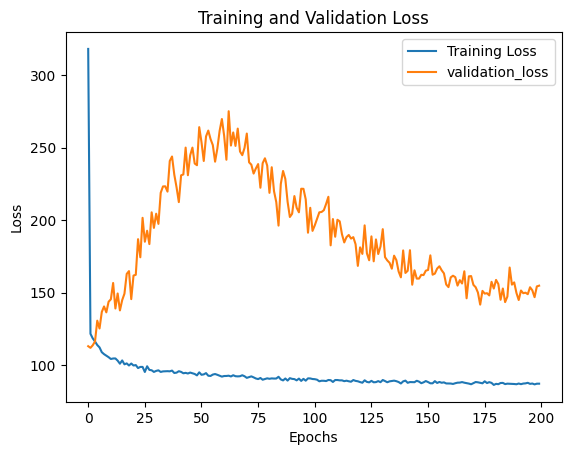

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label="validation_loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
model.evaluate(x_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.5453


154.87464904785156

## 7. Prediction System

In [61]:
import numpy as np

def prediction_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model):
    # Encode the discharge type
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]
    
    # Create input array and reshape for single sample
    x_input = np.array([[type_discharge_encoded, Capacity, Re, Rct]])
    
    # Scale the input
    x_input_scaled = scaler.transform(x_input)
    
    # Predict
    predicted_battery_life = model.predict(x_input_scaled)
    
    return predicted_battery_life[0][0]  # Return scalar value


In [63]:
# Example usage of the function with new input values
type_discharge = 'charge'  # New input for type
Capacity = 20.5            # Example numeric value for Capacity
Re = -2.983215e+11         # Example numeric value for Re
Rct = 1.223456e+12         # Example numeric value for Rct

# Call the prediction function with these new values
predicted_battery_life = prediction_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)

# Print the predicted battery life
print(f"Predicted Battery Life: {predicted_battery_life}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Battery Life: 432.08270263671875


## 7. Save files

In [64]:
import pickle

# Save the model, scaler, and label encoder to disk
with open('battery_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [65]:
model.save("battery_life_model.h5")